# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('data/human_body_temperature.csv')

In [17]:
# Your work here.

df.head(15)
#df.count()
#df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [18]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


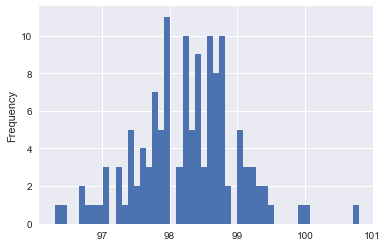

In [19]:
df.temperature.plot(kind='hist', bins=50)


# 1. Is the distribution of body temperatures normal? 

Because the number of data points is low, it is impossible to determine if the distribution is completely normal.  However, the distribution does follow the general shape of a normal distribution.

# 2. Is the sample size large? Are the observations independent? 

According to most statisticians, a sample size of 130 should be sufficiently large to fulfill the requirements of the central limit theorem.

The observations are independent because each temperature was taken from separate individuals.


# 3. Is the true population mean really 98.6 degrees F? 
According to the sample, the sample mean is calculated to be 98.25 degrees.  In the following answers we will use the central limit theorem to determine what the probability is that we can get a sample mean of 98.25 if the true population mean is 98.6 degrees.

## Would you use a one-sample or two-sample test? Why?
We will use a one-sample test because we are comparing the results of one sample mean to a theoretical population mean.  The null hypothesis will state that the true population mean is 98.6 degrees, and we will determine if the value of 98.25 degrees is probable.  The alternative hypothesis is that the true population mean is NOT 98.6 degrees.

We will not use the two-sample test because we only have one sample of both men and women to work with.  However, when we compare the samples of men to the samples of women, then we will use the two-sample test.


## In this situation, is it appropriate to use the t or z statistic? 
In this problem, we have a large sample size (130), but we do not know the population standard deviation.  Because of this, most statistics sources say we should use the t statistic, even though others say that for a large sample size, it is sufficient to approximate the population standard deviation (sigma) with the sample standard deviation (s).

Using the t-score:

$n = 130 $

$\bar{x} = 98.25 $

$s = 0.733 $

If we formulate our null hypothesis to be "98.6 is the true population mean", then what is the probability that we can get a sample mean of 98.25 degrees?

We will calculate the t-score thus:

$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} = \frac{98.25 - 98.6}{\frac{0.733}{\sqrt{130}}} = -5.47 $$

This is an extremely low t-score with a probability of almost 0%.  Therefore, we will reject the null hypothesis and accept the alternative hypothesis that "98.6 is NOT the true population mean".


## Now try using the other test. How is the result be different? Why? 

Using the z-score:

$n = 130 $

$\bar{x} = 98.25 $

$s = 0.733 $

If we formulate our null hypothesis to be "98.6 is the true population mean", then what is the probability that we can get a sample mean of 98.25 degrees?

We will first calculate the standard deviation of the sampling distribution $\sigma_\bar{x}$:

$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

But since we don't know the population standard deviation, we must approximate $\sigma_\bar{x}$ using our sample standard deviation s:

$$ \hat{\sigma_\bar{x}} = \frac{s}{\sqrt{n}} \approx \frac{0.733}{\sqrt{130}} = 0.064 $$

From this, we calculate our z-score thus:

$$ z = \frac{\bar{x} - \mu}{\sigma_\bar{x}} = \frac{98.25 - 98.6}{0.064} = -5.47 $$

This is a really high z-score with an almost 0% probability that we can achieve a sample result of 98.25 degrees if 98.6 degrees is our true population mean.

Therefore, we will accept the alternative hypothesis that 98.6 is NOT the true population mean.

This is the same result as the t-score because we have a large sample size.

# 4. At what temperature should we consider someone's temperature to be "abnormal"? 
## Start by computing the margin of error and confidence interval. 

$n = 130$

$\bar{x} = 98.25$ degrees

$s = 0.733$ degrees

We will assume a 95% confidence interval.  Using the empirical rule, we will want to be 2 standard deviations away from the mean of the sampling distribution.

From question 3, we estimated $\sigma_\bar{x} = 0.065$ using the sample standard deviation to approximate the population std dev.

So $2 \times 0.064 = 0.128$.  Our margin of error for the mean of $98.25 \pm 0.128$ degrees f with a confidence interval of 98.122 to 98.378 degrees f.

We can see, however, that a great number of the temperatures in the dataset fall outside this margin.  So this is a confidence interval that the mean falls within this region, not that the normal temps fall within this region.

If we treat the actual distribution of temperatures as a normal distribution (as opposed to the sampling distribution), we can use the empirical rule again to see where 95% of the results will fall.  Using the sample standard deviation of 0.733, we can compute an interval:

$2 \times 0.733 = 1.466$ which means that 95% of temperatures will be $98.25 \pm 1.466$ or 96.78 to 99.7 degrees F.

Temperatures that fall outside of this range should be considered abnormal.



# 5. Is there a significant difference between males and females in normal temperature? 
## What test did you use and why? 
## Write a story with your conclusion in the context of the original problem. 

In [20]:
males = df[df.gender=='M']
females = df[df.gender=='F']

In [21]:
males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [22]:
females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


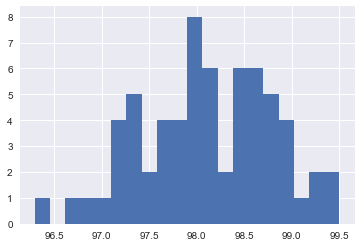

In [23]:
males.temperature.hist(bins=20)

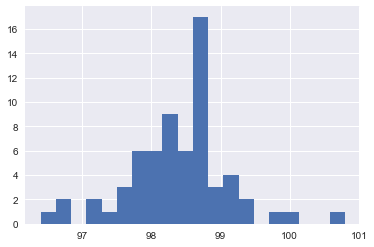

In [24]:
females.temperature.hist(bins=20)

To answer this question, we will use the central limit theorem to determine a confidence interval for the difference between the means of the temperatures of males and females.  We will assume a confidence level of 95%.

From our data:

$\bar{x}_{male} = 98.10$

$n_{male} = 65$

$s_{male} = 0.70$


$\bar{x}_{female} = 98.39$

$n_{female} = 65$

$s_{female} = 0.74$


$\mu_{\bar{x}_{female} - \bar{x}_{male}} = 98.10 - 98.39 = 0.29$

$\sigma_{\bar{x}_{male} - \bar{x}_{female}} = \sqrt{\frac{(\sigma_{male})^2}{n_{male}} + \frac{(\sigma_{female})^2}{n_{female}}}  $

Because we don't have the population $\sigma$ of the male and female populations, we will approximate this value with the standard deviations of our sample:

$\sigma_{\bar{x}_{male} - \bar{x}_{female}} \approx \sqrt{\frac{(0.70)^2}{65} + \frac{(0.74)^2}{60}} = 0.126 $

Using the empirical rule, we will use a standard deviation of 2 for our 95% probability using a two-tailed test.

$\sigma_{\bar{x}_{male} - \bar{x}_{female}} \times 2 = 0.252$

And our confidence interval is: $0.29 \pm 0.252$ or 0.038 to 0.542.  Because both ends of our confidence interval is above 0, there is a 95% chance that there is at least a 0.038 difference between the mean of the temperatures of men and women.





## Conclusion
According to our data and our calculations, it appears that the commonly accepted mean human body temperature of 98.6 is inaccurate.  Our data indicates that the value is closer to 98.2, but we may need additional samples to verify this mean.

In addition, we can see that other factors, such as the biological differences between genders, may also influence this mean.
